># Exploratory Data Analysis for QuickMart

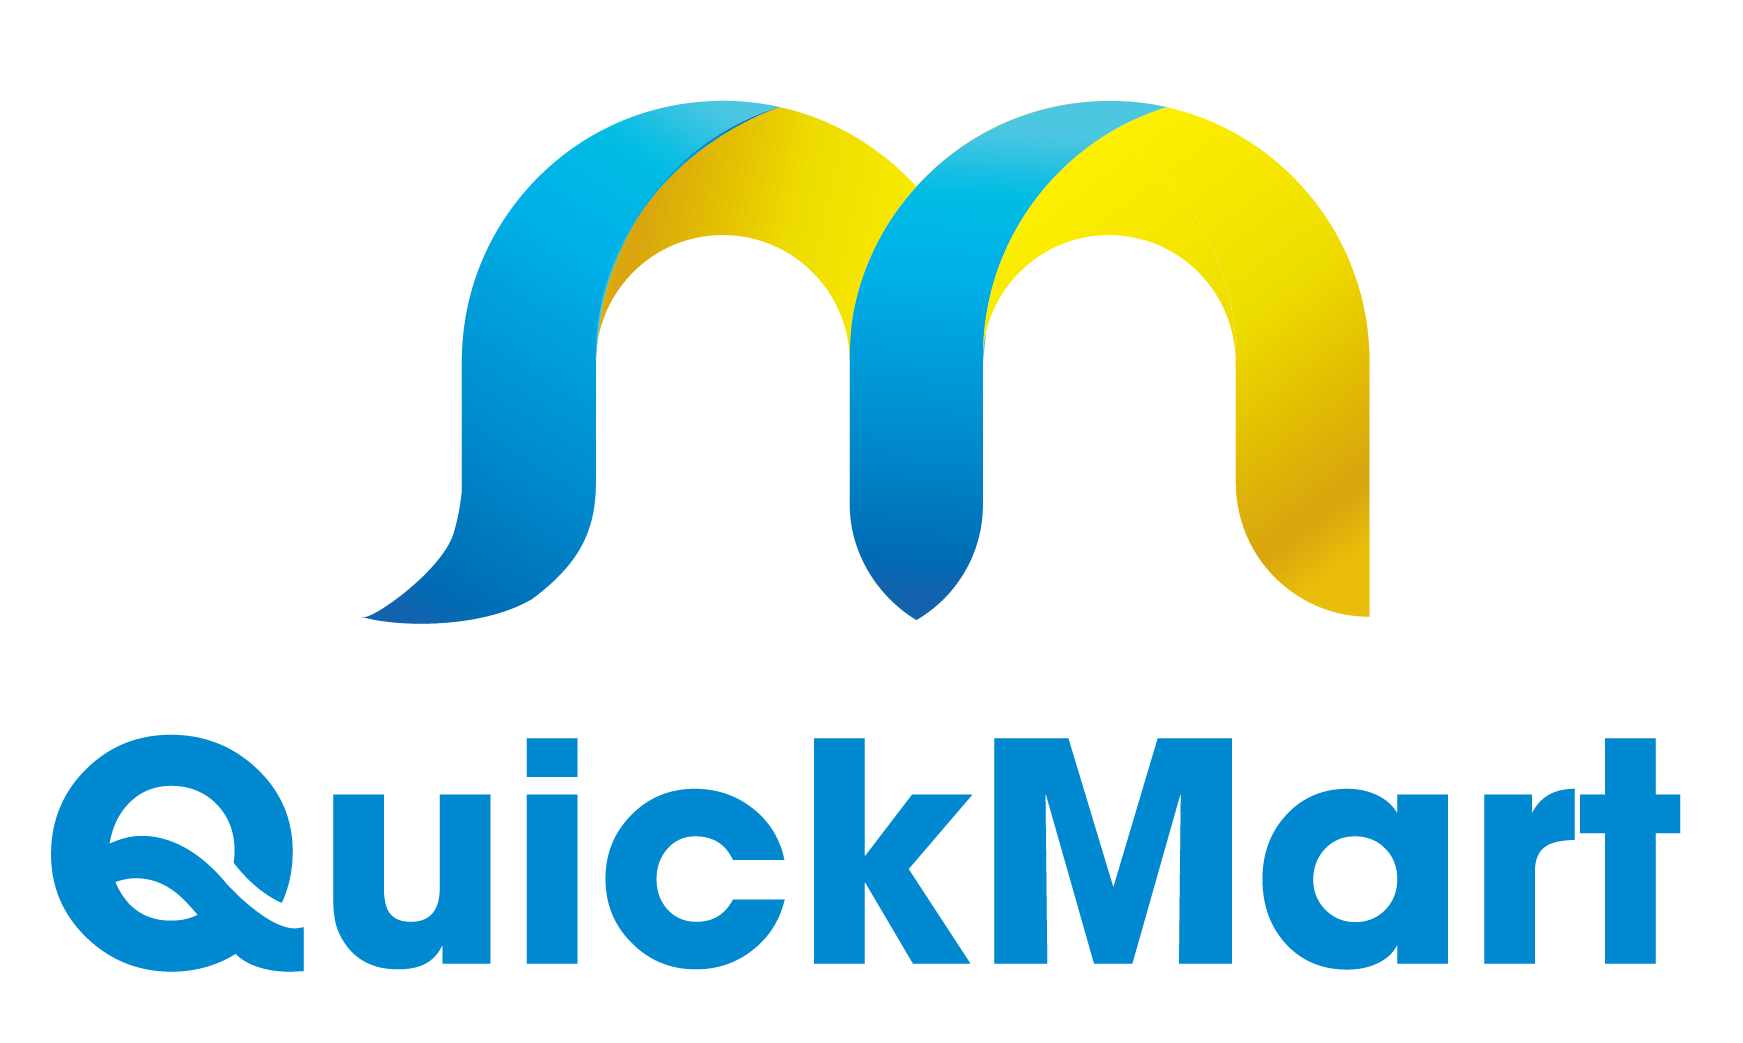

## Introduction

In the ever-evolving landscape of the retail industry, supermarkets play a pivotal role in meeting the daily needs of consumers. With the advent of technology and the availability of large volumes of data, supermarkets are now in a unique position to optimize their operations and enhance the shopping experience. Exploratory Data Analysis (EDA) is a powerful approach that can provide valuable insights into supermarket sales data. 

In this EDA project, we will delve into the world of QuickMart sales data between Janaury - March of 2019 to uncover patterns, trends, and opportunities that can drive informed decision-making and contribute to the supermarket's growth and success.

## Business Tasks

 •	**Customer Demographics:** What is the gender distribution among customers, and does it impact the choice of product line?

 •	**Branch Performance:** How do sales and customer types differ across the three branches of the business?

 •	**Product Line Analysis:** Which product line generates the highest total sales and gross income?

 •	**Pricing Strategy:** Are there any correlations between unit price, quantity, and customer ratings? Can this information be       used to adjust pricing strategies?

 •	**Payment Methods:** What are the preferred payment methods among customers, and do they vary by branch?

 •	**Time Analysis:** Are there specific months, times of the day or days of the week when sales tend to peak or dip??

 •	**Customer Loyalty:** Do certain customer types tend to generate more sales, and are they more satisfied with their shopping     experience?

 •	**City Comparison:** Are there significant differences in Quantity sold, customer ratings, or product preferences between       cities??


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Importing the dataset

In [2]:
df_sales = pd.read_excel("supermarket_sales.xlsx")
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


## Exploring the dataset

In [3]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_sales.shape

(1000, 17)

In [5]:
df_sales.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
df_sales = df_sales.rename(columns={'gross income': 'gross_income'})

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
df_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross_income               0
Rating                     0
dtype: int64

In [10]:
# Spliting the date column to day, month and year

df_sales["Day"] = (df_sales["Date"]).dt.day_name()
df_sales["Day Id"] = (df_sales["Date"]).dt.weekday
df_sales["Month"] = (df_sales["Date"]).dt.month_name()
df_sales["Month Id"] = (df_sales["Date"]).dt.month
df_sales["Year"] = (df_sales["Date"]).dt.year

In [11]:
# splitting the time column to Hours

df_sales['Time'] = pd.to_datetime(df_sales['Time'], format='%H:%M:%S')
df_sales['Hour'] = (df_sales["Time"]).dt.hour

In [12]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross_income,Rating,Day,Day Id,Month,Month Id,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,Saturday,5,January,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,Friday,4,March,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,Sunday,6,March,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,Sunday,6,January,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,Friday,4,February,2,2019,10


## Customer Demographics

### Gender distribution among Customers

In [13]:
# Calculating the Gender distribution among customers 

Gender_distribution = df_sales.value_counts("Gender")
Gender_distribution

Gender
Female    501
Male      499
dtype: int64

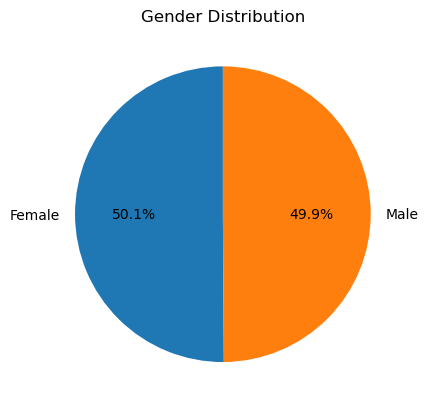

In [14]:
# Plotting the chart for Gender distribution among customers

Gender_distribution.plot(kind = "pie", autopct="%1.1f%%",startangle=90 )
plt.title("Gender Distribution")
plt.show()

From the data, it's apparent that there is only a slight difference in the gender distribution of shoppers. However, it's worth noting that there are more females (502 recorded) than males (409 recorded) among the shoppers, suggesting that females may make up a slightly larger portion of the customer base.

### Product line Analysis by Gender

In [15]:
# calculating the product line performance per Gender

Product_gender = (df_sales.pivot_table(index = "Product line",
                    columns = "Gender",
                    values = "Quantity",
                    aggfunc = sum))
Product_gender

Gender,Female,Male
Product line,,
Electronic accessories,488,483
Fashion accessories,530,372
Food and beverages,514,438
Health and beauty,343,511
Home and lifestyle,498,413
Sports and travel,496,424


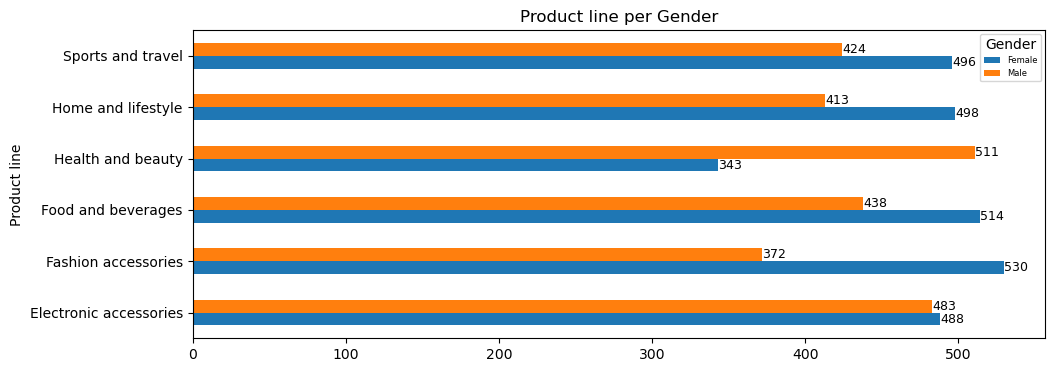

In [16]:
# plotting the chart for product line performance per Gender

ax = Product_gender.plot(kind = "barh",stacked = False, figsize = (11,4))

plt.title("Product line per Gender")
plt.legend(title = "Gender", loc = "upper right", fontsize = (6))

for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{int(width)}', ha="left", va="center", fontsize=9, color="black")
        
plt.show()

Female customers account for the majority of product sales in five product lines, with the exception of the Health and Beauty product line.

## Branch Performance

### Sales per Branch

In [17]:
# calculating the sales per Branch 

Branch_sales = round(df_sales.pivot_table(index = "Branch",
                    values = "Total",
                    aggfunc = "sum"),2)
Branch_sales

,Total
Branch,
A,106200.37
B,106197.67
C,110568.71


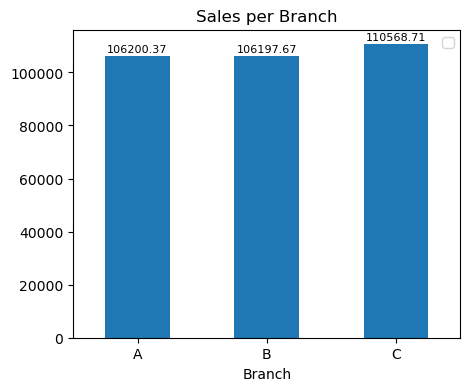

In [18]:
# plotting the chart for sales per Branch

ax = Branch_sales.plot(kind="bar", figsize=(5, 4))

plt.title("Sales per Branch")
plt.legend([])
plt.xticks(rotation=360)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")
    
plt.show()



Branch C achieved the highest revenue, generating a total of 110,568.71 INR.

### Customer type per Branch

In [19]:
# calculating the number of customers for each Branch 

Branch_customers = df_sales.groupby(["Branch","Customer type"]).size().unstack()
Branch_customers

Customer type,Member,Normal
Branch,,
A,167,173
B,165,167
C,169,159


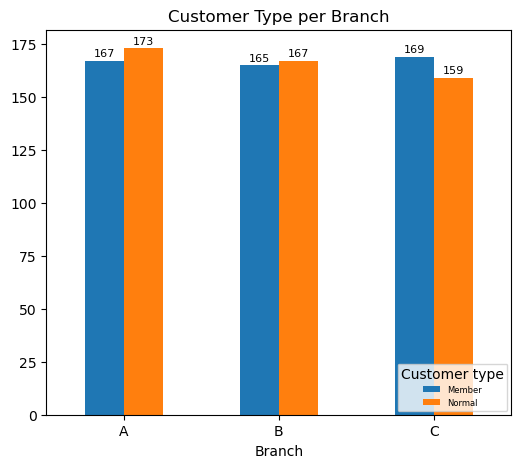

In [20]:
# plotting the chart for number of customers per Branch

ax = Branch_customers.plot(kind = "bar",figsize = (6,5))

plt.title("Customer Type per Branch")
plt.xticks(rotation = 360)
plt.legend(title = "Customer type", loc = "lower right", fontsize = 6)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")
    
plt.show()


Branch A and B have a higher number of regular customers making purchases, while Branch C has a larger number of members among its customer base.

## Product Line Analysis

### Sales and Gross Income per Product line

In [21]:
# calculating the Sales and Gross income for each Product line

Sales_Gross_product = df_sales.pivot_table(index = "Product line",
                    values = ["Total","gross_income"],
                    aggfunc = "sum").sort_values("Total", ascending = False)
Sales_Gross_product

,Total,gross_income
Product line,,
Food and beverages,56144.8440,2673.5640
Sports and travel,55122.8265,2624.8965
Electronic accessories,54337.5315,2587.5015
Fashion accessories,54305.8950,2585.9950
Home and lifestyle,53861.9130,2564.8530
Health and beauty,49193.7390,2342.5590


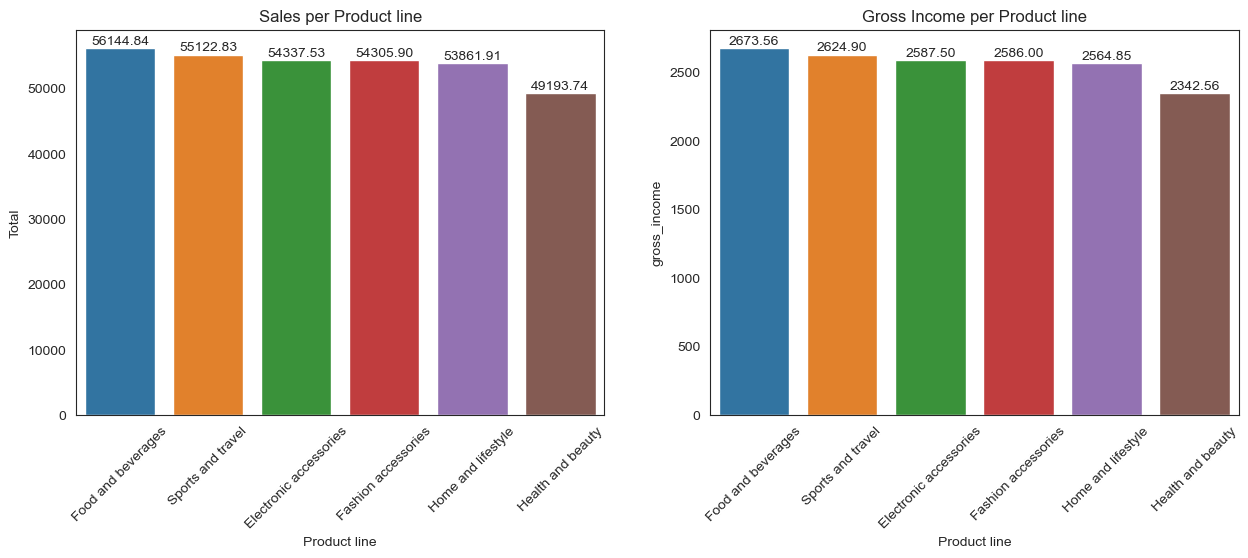

In [22]:
# plotting the the chart for Sales and Gross income per Product line

sns.set_style("white")
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(15, 5))

sns.barplot(x = Sales_Gross_product.index, y = Sales_Gross_product.Total, ax = ax1)
ax1.set_title("Sales per Product line")
ax1.tick_params(axis = "x",rotation = 45)

for p in ax1.patches:
    value = round(p.get_height(), 2)
    label = "{:.2f}".format(value)
    ax1.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
sns.barplot(x = Sales_Gross_product.index, y = Sales_Gross_product.gross_income, ax = ax2)
ax2.set_title("Gross Income per Product line")
ax2.tick_params(axis = "x",rotation = 45)

for p in ax2.patches:
    value = round(p.get_height(), 2)
    label = "{:.2f}".format(value)
    ax2.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


The highest-performing product line is "Food and Beverages," which generated a total revenue of 56144.84 INR and a gross income of 2673.56 INR. In contrast, the "Health and Beauty" product line is the lowest-performing, with a total revenue of 49193.74 INR and a gross income of 2342.56 INR.

##  Pricing Strategy

### Are there any correlations between unit price, quantity, and customer ratings? Can this information be used to adjust pricing strategies?

In [23]:
# calculating thr correlation 

corr_matrix = df_sales[["Unit price","Quantity","Rating"]].corr()
corr_matrix

,Unit price,Quantity,Rating
Unit price,1.000000,0.010778,-0.008778
Quantity,0.010778,1.000000,-0.015815
Rating,-0.008778,-0.015815,1.000000


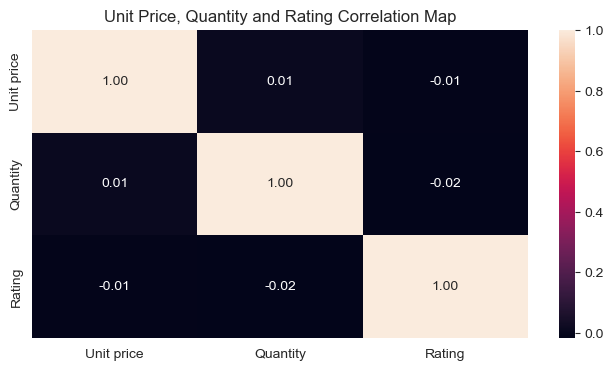

In [24]:
# plotting the correlation Map

fig,ax = plt.subplots(figsize = (8,4))

sns.heatmap(corr_matrix,annot = True,fmt=".2f")
ax.set_title("Unit Price, Quantity and Rating Correlation Map")

plt.show()

Based on the correlation coefficients, there are very weak and nearly negligible linear relationships between these variables(Unit price, Quantity and Rating). Changes in unit price or quantity purchased do not appear to be strongly associated with changes in customer ratings.

## Payment Methods

### What are the preferred payment methods among customers, and do they vary by branch?

In [25]:
# Calculating number of customers who used each payment method

df_sales.groupby(["Payment"]).size().reset_index(name = "customers")

,Payment,customers
0,Cash,344
1,Credit card,311
2,Ewallet,345


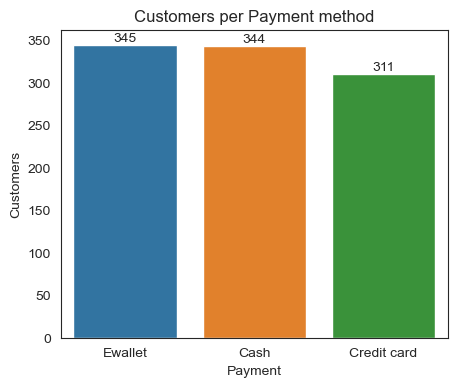

In [26]:
# plotting the chart for customers per payment methos

fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(x = "Payment",data = df_sales)
ax.set_title("Customers per Payment method")
ax.set_ylabel("Customers")

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()


The most preferred payment method by customers is the Ewallet payment method, with a total of 345 customers choosing this option.

In [27]:
# calculating the payment method per branch

Payment_branch = df_sales.groupby(["Branch","Payment"]).size().unstack().fillna(0)
Payment_branch

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


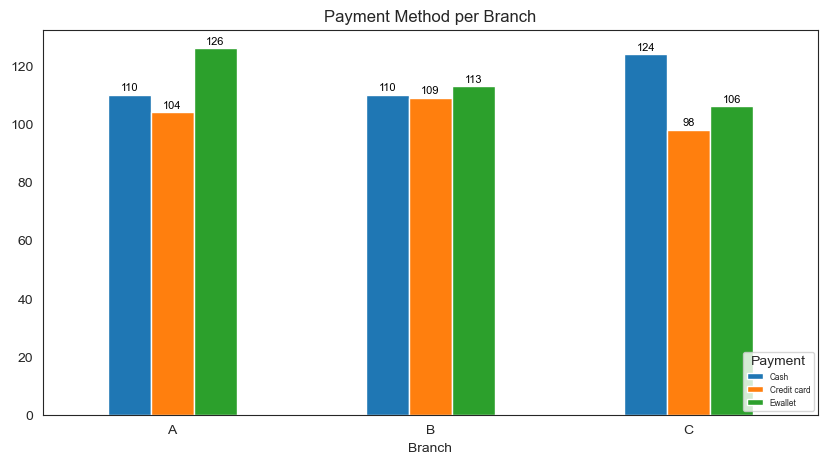

In [28]:
# plotting the chart for payment method per branch 

ax = Payment_branch.plot(kind = "bar", figsize = (10,5))
plt.title("Payment Method per Branch")
plt.legend(title = "Payment",loc = "lower right", fontsize = (6))
plt.xticks(rotation = 0)

for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color="black", xytext=(0, 5), 
                textcoords='offset points')

plt.show()
                    

The Ewallet payment method was the most preferred in Branch A and B, with a total of 126 and 113 customers choosing this option, respectively, while the Cash payment method was preferred in Branch C, with a total of 124 customers choosing this option.

## Time Analysis

### Are there specific months, times of the day or days of the week when sales tend to peak or dip?

In [29]:
# calculating sales per month

Sales_month = df_sales.pivot_table(index = ["Month Id","Month"],
                     values = "Total",
                     aggfunc = sum)
Sales_month

,,Total
Month Id,Month,
1,January,116291.868
2,February,97219.374
3,March,109455.507


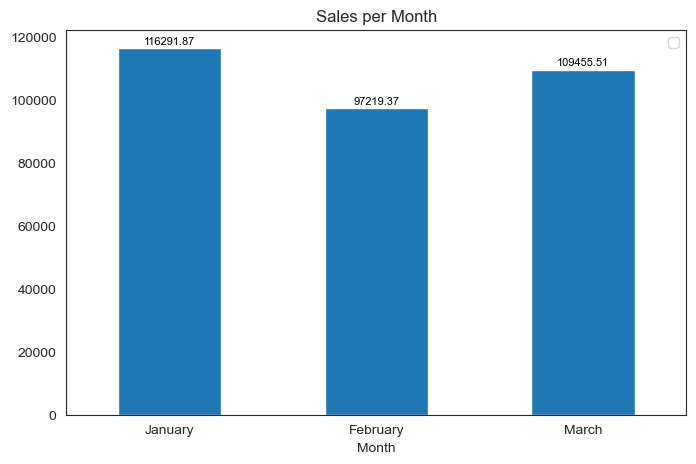

In [30]:
# plotting the chart for sales per month

ax = Sales_month.reset_index().plot(kind = "bar",x = "Month",y = "Total",figsize = (8,5))

plt.title("Sales per Month")
plt.xticks(rotation  = 0)
plt.legend([])

for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color="black", xytext=(0, 5), 
                textcoords='offset points')
                
plt.show()

January recorded the highest revenue, totaling 116291.87 INR, while February recorded the lowest revenue, with a total of 97219.37 INR.

In [31]:
# calculating the sales performance per weekday

Weekday_sales = df_sales.pivot_table(index = ["Day Id","Day"],
                    values = "Total",
                    aggfunc = "sum")
Weekday_sales

,,Total
Day Id,Day,
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


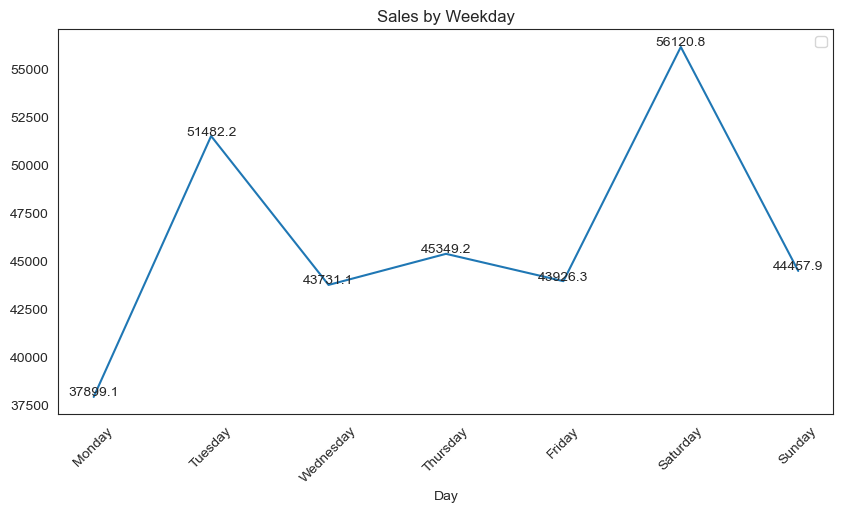

In [32]:
# plotting the chart for sales by weekday

ax = Weekday_sales.reset_index().plot(kind = "line", x = "Day", y = "Total",figsize=(10,5))
plt.title("Sales by Weekday")
plt.xticks(rotation = 45)
plt.legend([])

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = "{:.1f}".format(y)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 1), fontsize = 10, ha='center')

plt.show()

Revenue is at its peak on Saturdays, with a total of 56120.8 INR recorded on Saturdays. Conversely, revenue is at its lowest on Mondays, with a total of 37899.1 INR recorded.

In [33]:
# calculating the sales performance per time of the day

Sales_time = df_sales.pivot_table(index = "Hour",
                    values = "Total",
                    aggfunc = sum)
Sales_time

,Total
Hour,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


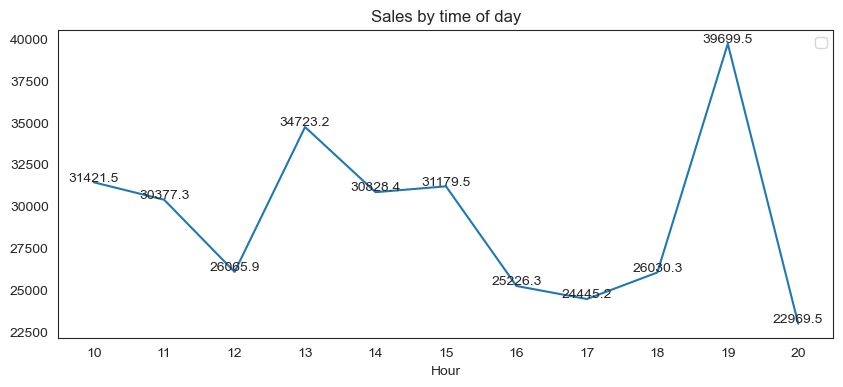

In [34]:
# plotting the chart for sales per time of day

ax = Sales_time.plot(kind = "line", figsize = (10,4))
plt.title("Sales by time of day")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.legend([])

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = "{:.1f}".format(y)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 1), fontsize = 10, ha='center')

        
plt.show()

The peak period of the day is 7 PM, with a total revenue of 39699.5 INR recorded. Conversely, the least period of the day is 8 PM, with a total of 22969.5 INR recorded.

##  Customer Loyalty

### Do certain customer types tend to generate more sales, and are they more satisfied with their shopping experience?

In [35]:
# calculating sales per customer type 

Sales_customer = df_sales.pivot_table(index = "Customer type",
                    values = "Total",
                    aggfunc = sum)
Sales_customer

,Total
Customer type,
Member,164223.444
Normal,158743.305


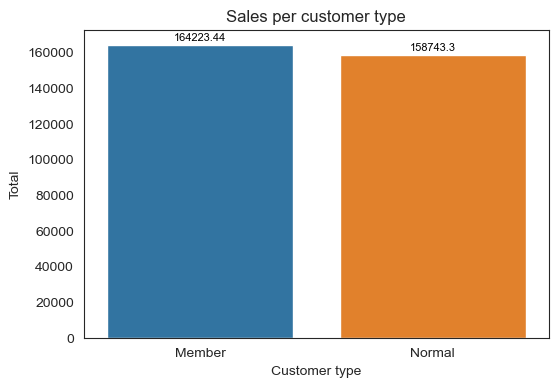

In [36]:
# plotting the chart for Sales and quantity per customer type

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x = Sales_customer.index, y = Sales_customer.Total)

ax.set_title("Sales per customer type")

for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color="black", xytext=(0, 5), 
                textcoords='offset points')

plt.show()

Customers who are registered members generated the highest revenue, totaling 164223.44 INR.

In [37]:
# calculating the average rating per customer type

Rating_customer = df_sales.groupby(["Customer type"])["Rating"].mean().reset_index()
Rating_customer

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


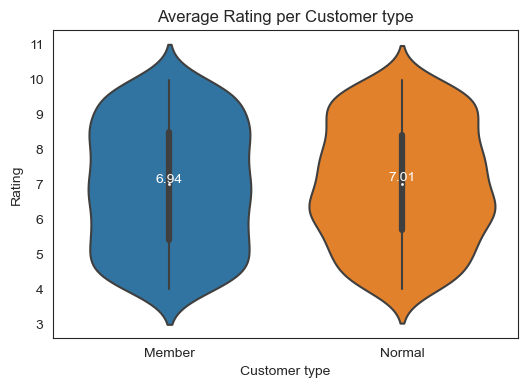

In [38]:
# plotting the chart for average rating per customer type
sns.set_style("white")
fig,ax = plt.subplots(figsize=(6,4))
sns.violinplot(x = "Customer type", y = "Rating", data = df_sales)
ax.set_title("Average Rating per Customer type")

for i, v in enumerate(df_sales.groupby("Customer type")["Rating"].mean()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10,color = "white")


plt.show()

Customers who are not registered members recorded the highest average rating, with a rating of 7.01.

## City Comparison

### Are there significant differences in Quantity sold, customer ratings, or product preferences between cities?

In [39]:
# calculating quantity sold per city

City_quantity = df_sales.pivot_table(index = "City",
                    values = "Quantity",
                    aggfunc = sum).sort_values("Quantity", ascending = False)
City_quantity 

,Quantity
City,
Yangon,1859
Naypyitaw,1831
Mandalay,1820


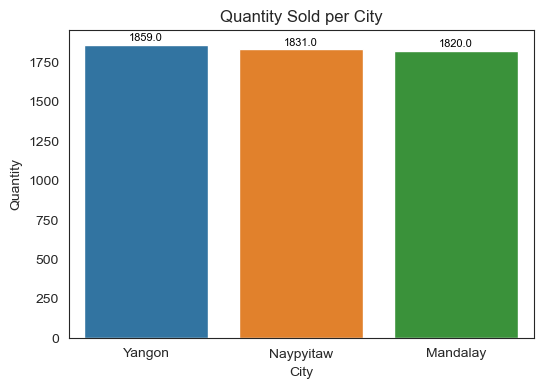

In [40]:
# plotting the chart for the quantity sold per city

sns.set_style("white")
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x = City_quantity.index, y = City_quantity.Quantity)
ax.set_title("Quantity Sold per City")

for p in ax.patches:
    value = round(p.get_height(), 2)
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color="black", xytext=(0, 5), 
                textcoords='offset points')

plt.show()

Yangon leads in terms of the quantity sold, with a total of 1859 units sold, while Mandalay recorded the lowest quantity ordered, with a total of 1820 units.

In [41]:
# calculating the average rating per city

City_rating = df_sales.pivot_table(index = "City",
                    values = "Rating",
                    aggfunc = "mean")
City_rating

,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


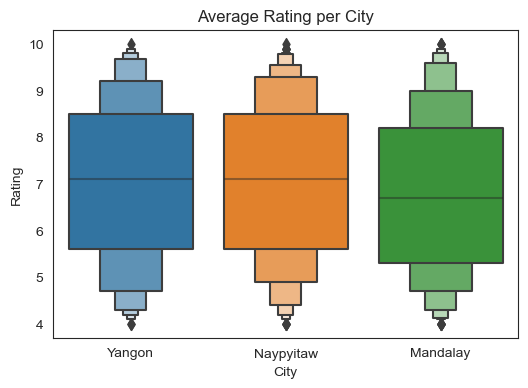

In [42]:
# plotting the chart for average rating per city

sns.set_style("white")
fig, ax = plt.subplots(figsize=(6,4))
sns.boxenplot(x = "City", y = "Rating", data = df_sales)
ax.set_title("Average Rating per City")
   
plt.show()

Yangon and Naypyitaw received higher customer ratings from customers, with an average rating of 7, while Mandalay recorded the lowest customer rating, with an average rating of 6.8.

In [43]:
# calculating the product preferences per city

product_city = df_sales.pivot_table(index = "City",
                    columns = "Product line",
                    values = "Quantity",
                    aggfunc = sum)
product_city

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,316,297,270,320,295,322
Naypyitaw,333,342,369,277,245,265
Yangon,322,263,313,257,371,333


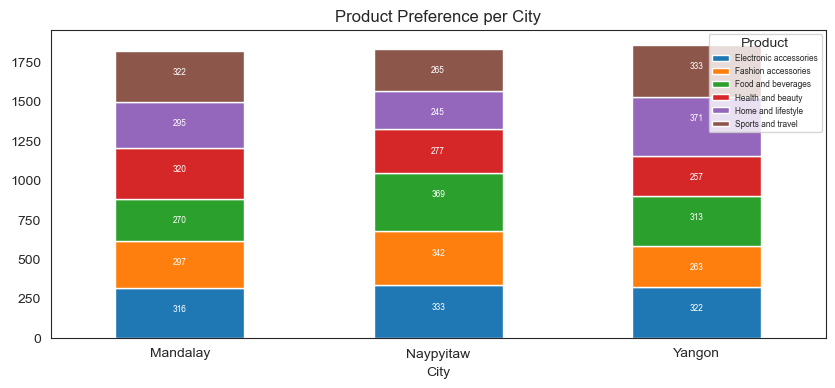

In [44]:
# plotting the chart for product preferences per city

sns.set_style("white")
ax = product_city.plot(kind = "bar",stacked = True,figsize = (10,4))
plt.title("Product Preference per City")
plt.xticks(rotation = 0)
plt.legend(title = "Product", loc = "best", fontsize = 6)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f"{height:.0f}", (x + width / 2, y + height - 150), ha="center", color = "white",fontsize=6)


plt.show()

In Mandalay, the most preferred product line is Health and Beauty (320 quantities sold), in Naypyitaw it is Food and Beverages (369 quantities sold), and in Yangon it is Home and Lifestyle (371 quantities sold).

## Conclusion:

From the data analysis, several key insights have been gathered:

1. There is a slightly higher number of female shoppers compared to male shoppers, with females accounting for a slightly larger portion of the customer base.

2. Female customers tend to dominate sales across various product lines, except for the Health and Beauty category.

3. Branch C stands out with the highest revenue generation of $110,568.71.

4. Branches A and B attract more regular customers, while Branch C has a larger membership base.

5. "Food and Beverages" is the top-performing product line in terms of revenue and gross income, while "Health and Beauty" is the lowest-performing.

6. There are very weak and almost negligible linear relationships between unit price, quantity, and customer ratings.

7. Ewallet is the preferred payment method among customers.

8. January is the highest revenue-generating month, while February records the lowest revenue.

9. Saturdays witness the highest revenue, while Mondays see the lowest revenue.

10. The peak sales period occurs at 7 PM, and the lowest sales period is at 8 PM.

11. Registered members generate the highest revenue.

12. Non-registered members provide the highest average rating.

13. Yangon leads in quantity sold, while Mandalay has the lowest quantity ordered.

14. Yangon and Naypyitaw receive higher customer ratings, while Mandalay has a slightly lower average rating.

15. The most preferred product line varies by city, with Health and Beauty in Mandalay, Food and Beverages in Naypyitaw, and Home and Lifestyle in Yangon.



## Recommendations:

Based on these findings, here are some recommendations:

1. **Marketing Strategy:** Given that females make up a significant portion of the customer base and dominate sales in many product lines, consider tailoring marketing strategies to target female shoppers more effectively.

2. **Branch Performance:** Investigate why Branch C is performing exceptionally well. This could provide insights into strategies that can be replicated in other branches.

3. **Product Line Enhancement:** Explore opportunities to improve the performance of the "Health and Beauty" product line, which is currently the lowest-performing.

4. **Payment Methods:** Given the popularity of Ewallet payment, consider offering promotions or incentives for customers who choose this method to encourage its continued use.

5. **Seasonal Marketing:** Leverage the knowledge that January is the highest revenue month to plan special promotions or events during this period.

6. **Weekday Strategies:** Develop strategies to boost sales on Mondays, which currently have the lowest revenue.

7. **Peak Sales Period:** Focus on maximizing sales during the peak period at 7 PM, potentially by offering promotions or enhancing the shopping experience.

8. **Membership Benefits:** Enhance the benefits of membership to encourage more customers to join and increase revenue.

9. **Customer Satisfaction:** Investigate why non-registered members provide the highest ratings. Understanding their preferences and needs can help improve overall customer satisfaction.

10. **City-Specific Marketing:** Tailor marketing efforts to each city's preferences, as product line preferences vary by location.

By implementing these recommendations, the business can further optimize its operations and enhance customer satisfaction, ultimately leading to increased revenue and growth.